### Image Processing

* blank 이미지만들기

In [ ]:
import cv2

import numpy as np


# 0~255
# black~white

img = np.full((500,500,3), 255, dtype=np.uint8) # 1byte 정수

cv2.imwrite('d:/images/blank_500.jpg', img)

print(img)

In [ ]:
import matplotlib.pyplot as plt

import numpy as np

# 2D image
img=np.array([[0,0,0,0,0,0,0,0,0,0],

              [0,0,0,0,0,0,0,0,0,0],

              [0,0,0,1,1,1,1,1,0,0],

              [0,0,0,0,0,0,0,1,0,0],

              [0,0,0,1,1,1,1,1,0,0],

              [0,0,0,0,0,0,0,1,0,0],

              [0,0,0,1,1,1,1,1,0,0],

              [0,0,0,0,0,0,0,0,0,0],

              [0,0,0,0,0,0,0,0,0,0]],dtype=np.float32)

plt.imshow(img,cmap='gray')

In [ ]:
img = cv2.imread('d:/images/pencils.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # openCV=bgr to matplot=rgb
gray = cv2.resize(gray, (16,16))


# 픽셀의 평균값
avg = gray.mean()


# 평균값을 기준으로 0과 1로 변환
bin = 1 * (gray > avg)
print(bin)

# 2진수 문자열을 16진수 문자열로 변환
dhash = []
for row in bin.tolist():
    s = ''.join([str(i) for i in row])
    dhash.append('%02x'%(int(s,2)))

dhash = ''.join(dhash)
print(dhash)
cv2.namedWindow('pistol', cv2.WINDOW_GUI_NORMAL)
cv2.imshow('pistol', img)
cv2.waitKey(0)

In [ ]:
import cv2

import matplotlib.pyplot as plt

#img = cv2.imread("d:/images/rear_garden.PNG")
img = cv2.imread('d:/images/pencils.jpg')
print(img.shape) # height, width, channel
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)



In [ ]:
###########################

# 이미지의 특정 위치 = 픽셀(Pixel), Pixel(BGB)
(b, g, r) = img[0, 0]
print("Pixel at (0, 0) - Red: {}, Green: {}, Blue: {}".format(r, g, b))



In [ ]:
###########################

# ROI
ROI = img[50:100, 50:100]
plt.imshow(ROI)



In [ ]:
###########################

# 이미지 내에서 특정한 범위만 지정하여 색상을 변경

img[50:100, 50:100] = (0, 0, 255)

plt.imshow(img)

* 이미지-컬러채널

In [ ]:
import cv2

import matplotlib.pyplot as plt

import numpy as np

img = cv2.imread("d:/images/rear_garden.PNG")

print(img.shape)

(height, width) = img.shape[:2]

center = (width // 2, height // 2)

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img)

In [ ]:
# 이미지의 채널 분할
(Blue, Green, Red) = cv2.split(img)
zeros = np.zeros(img.shape[:2], dtype = "uint8")
print("Red.shape", Red.shape)

# red
img = cv2.cvtColor(cv2.merge([zeros, zeros, Red]), cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [ ]:
# green

img = cv2.cvtColor(cv2.merge([zeros, Green, zeros]), cv2.COLOR_BGR2RGB)

plt.imshow(img)

In [ ]:
# blue
img = cv2.cvtColor(cv2.merge([Blue, zeros, zeros]), cv2.COLOR_BGR2RGB)

plt.imshow(img)

In [ ]:
# 분할된 3채널 합치기

BGR = cv2.merge([Blue, Green, Red])

plt.imshow(BGR)

In [ ]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.imshow(gray,cmap='gray')

* 도형 텍스트 처리

In [ ]:
import cv2

img = cv2.imread("d:/images/rear_garden.PNG")

print(img.shape)



In [ ]:
import matplotlib.pyplot as plt

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img)

In [ ]:
# 이미지 내에서 특정한 범위만 지정하여 색상을 변경

img[50:100, 50:100] = (0, 0, 255)

plt.imshow(img)

In [ ]:
# 선그리기

# 시작점, 끝점, 색상, 선굵기

cv2.line(img, (350, 100), (500, 100), (255, 0, 0), 5)  

plt.imshow(img)

In [ ]:
# 사각형 그리기

# 시작점, 끝점, 색상, 선굵기

cv2.rectangle(img, (150, 50), (200, 100), (0, 255, 0), 5)  

plt.imshow(img)

In [ ]:
# 원그리기

# 중심점, 반지름, 색상, -1 색상 채우기

cv2.circle(img, (275, 75), 25, (0, 255, 255), -1)  

plt.imshow(img)

In [ ]:
import numpy as np

from PIL import ImageFont, ImageDraw, Image

base_img = Image.fromarray(img).convert('RGBA')

# blank 이미지

txt_img = Image.new('RGBA', base_img.size, (255,255,255,0))  # Alpha 투명도

fontpath = "c:/windows/fonts/malgun.ttf"    

font = ImageFont.truetype(fontpath, 70)  # 폰트 설정

draw = ImageDraw.Draw(txt_img)  

draw.text((200, 250), "안녕하세요", font=font, fill=(255,255,255,128)) # alpha 반투명

draw.text((200, 350), "안녕하세요", font=font, fill=(255,255,255,255)) # alpha 불투명

# 이미지 결합

comp_img = Image.alpha_composite(base_img,txt_img)  

img = np.array(comp_img)

plt.imshow(img)

In [ ]:
# pip install opencv-python



#감마 보정
#감마값 1보다 크면 밝아지고, 작으면 어두워짐

import cv2
import matplotlib.pyplot as plt

img = cv2.imread("d:/images/apple.jpg")
cv2.imshow("original", img)  
cv2.waitKey(0)

In [ ]:
image_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(image_rgb)

plt.axis("off")

plt.show()

In [ ]:
plt.figure(figsize=(20,5))

gamma = np.arange(0.5)

#plt.subplot(2, 5, i+1)
out = image_rgb.copy()
#out = image_rgb.astype(np.float64)
out = out.astype(np.float64)
out = ((out / 255) ** (1 / g)) * 255
print(out.min(), out.max())
out = out.astype(np.uint8)
print(out.min(), out.max())
plt.title(f'gamma:{g:.1f}')
plt.imshow(out)
plt.axis("off")

plt.show()

In [ ]:
import numpy as np

plt.figure(figsize=(20,5))

gamma = np.arange(0.1, 2.0, 0.2)

for i, g in enumerate(gamma):

    plt.subplot(2, 5, i+1)

    out = image_rgb.copy()
    #out = image_rgb.astype(np.float64)
    out = out.astype(np.float64)
    out = ((out / 255) ** (1 / g)) * 255
    out = out.astype(np.uint8)

    plt.title(f'gamma:{g:.1f}')

    plt.imshow(out)

    plt.axis("off")

plt.show()

In [ ]:
import cv2

import numpy as np

one = cv2.imread("d:/images/one.jpg")
two = cv2.imread("d:/images/two.jpg")
three = cv2.imread("d:/images/three.jpg")
four = cv2.imread("d:/images/four.jpg")

#plt.imshow(four)
#plt.axis("off")
#plt.show()

horizontal1 = np.full((50, one.shape[1], 3), [0, 0, 0], dtype=np.uint8)
horizontal2 = np.full((50, two.shape[1], 3), (0, 0, 0), dtype=np.uint8)

left = cv2.vconcat((one, horizontal1, three))
right = np.vstack((two, horizontal2, four))
vertical = np.full((left.shape[0], 50, 3), 0, dtype=np.uint8)
dst = cv2.hconcat((left, vertical, right))

cv2.imshow("dst", dst)

# 아무키 입력하면 종료
cv2.waitKey()
cv2.destroyAllWindows()

* 색상반전

In [ ]:
#색상 반전: 어두운 부분은 밝게, 밝은 부분은 어둡게

# 255 - 픽셀값

# 200 => 255 - 200 = 55

import cv2

import matplotlib.pyplot as plt

#img = cv2.imread("c:/data/images/plane.jpg")
img = cv2.imread("d:/images/apple.jpg")

image_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(image_rgb)

plt.axis("off")

plt.show()

In [ ]:
out = img.copy()

print(out[0][0:5])

out = 255 - out

print(out[0][0:5])

plt.imshow(out)

plt.axis("off")

plt.show()

* 영상 이진화

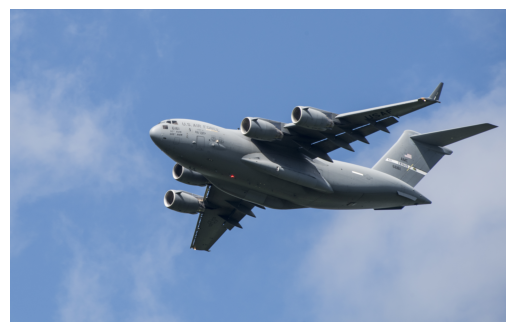

In [12]:
#영상 이진화

# 특정한 경계값을 기준으로 0,255로 만드는 작업

# 경계가 뚜렷해짐

import cv2

import matplotlib.pyplot as plt

img = cv2.imread("d:/images/plane.jpg")

image_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(image_rgb)

plt.axis("off")

plt.show()

In [13]:
# 픽셀값 127을 기준으로 0,255로 나누는 작업

# 127보다 작으면 0, 크면 255
# 기준값은 그림마다 다르게 설정해야됨

print(cv2.THRESH_BINARY) # =0
ret, dst = cv2.threshold(image_rgb, 127, 255, cv2.THRESH_BINARY)

print(image_rgb[0][:5]) #원본

print(ret) #경계값

print(dst[0][:5]) #출력값

0
[[111 144 195]
 [107 140 191]
 [117 150 201]
 [109 142 193]
 [108 141 192]]
127.0
[[  0 255 255]
 [  0 255 255]
 [  0 255 255]
 [  0 255 255]
 [  0 255 255]]


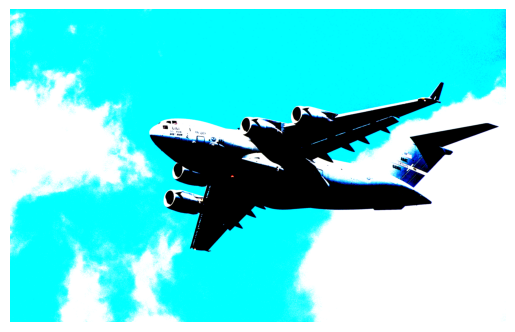

In [14]:
plt.imshow(dst, cmap="gray")

plt.axis("off")

plt.show()

* 적응형 이진화

In [ ]:
# Adaptive Threshold, 적응형 이진화: 픽셀마다 다른 임계값을 적용하는 방식
# 전역 이진화: 모든 픽셀에 같은 임계값을 적용하는 방식 이진화를 수행하는 방식

# 그림마다 기준값에 따라 이진화 결과가 달라지는데 이런문제를 해결하고자 한 방법
# ex) 조명의 변화나 반사가 심한 경우

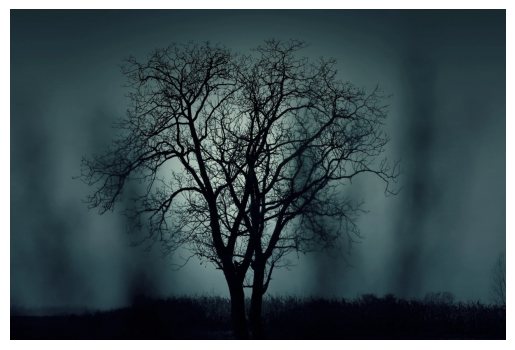

In [17]:
import cv2

import matplotlib.pyplot as plt

#img = cv2.imread("c:/data/images/tree.jpg")
img = cv2.imread("d:/images/tree.jpg")

image_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(image_rgb)

plt.axis("off")

plt.show()

In [18]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#adaptiveThreshold(입력이미지, 최대값, 적응형 이진화 플래그, 임계값 형식, 블록 크기, 감산값)

#cv2.ADAPTIVE_THRESH_MEAN_C    : 모든 픽셀에 평균 가중치 적용
#cv2.ADAPTIVE_THRESH_GAUSSIAN_C    : 모든 픽셀에 중심점으로부터의 거리에 대한 가중치 적용
#binary = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 467, 37)

binary = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 467, 37)

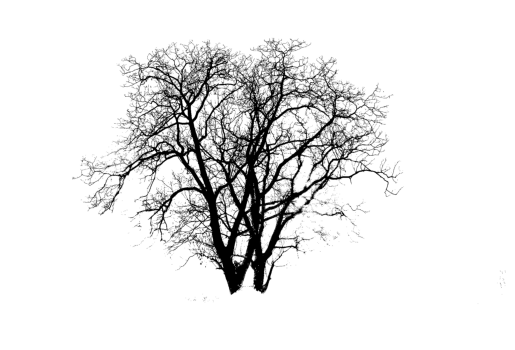

In [19]:
image_rgb = cv2.cvtColor(binary, cv2.COLOR_BGR2RGB)

plt.imshow(image_rgb)

plt.axis("off")

plt.show()

* 트랙바

In [15]:
import cv2

import numpy as np

def onChangeBlue(pos):

    global b

    b = pos

    cv2.imshow("Palette", createImage(b, g, r))

def createImage(b, g, r):

    return np.full((500, 500, 3), (b, g, r), dtype=np.uint8)

b, g, r = 0, 0, 0

cv2.namedWindow("Palette")

cv2.createTrackbar("Blue", "Palette", 55, 255, onChangeBlue)

cv2.createTrackbar("Green", "Palette", 0, 255, lambda x:x)

cv2.createTrackbar("Red", "Palette", 0, 255, lambda x:x)

while True:

    g = cv2.getTrackbarPos("Green", "Palette")

    r = cv2.getTrackbarPos("Red", "Palette")

    

    cv2.imshow("Palette", createImage(b, g, r))

    if cv2.waitKey(33) & 0xFF == ord('q'):

        break

cv2.destroyAllWindows()

error: OpenCV(4.8.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window_w32.cpp:2561: error: (-27:Null pointer) NULL window: 'Palette' in function 'cvGetTrackbarPos'


* 적응형이진화-트랙바

In [20]:
import cv2

def on_trackbar(pos):

    bsize = pos

    if bsize % 2 == 0: bsize = bsize - 1

    if bsize < 3: bsize = 3

    #적응형 이진화(가우시안 블러를 적용하여 노이즈를 제거한 후 이진화 처리)

    dst = cv2.adaptiveThreshold(src, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,

                               cv2.THRESH_BINARY, bsize, 5)

    cv2.imshow('dst', dst)

#src = cv2.imread('d:/images/sudoku.jpg', cv2.IMREAD_GRAYSCALE)
src = cv2.imread("d:/images/tree.jpg", cv2.IMREAD_GRAYSCALE)

cv2.imshow('src', src)

cv2.namedWindow('dst')

cv2.createTrackbar('Block Size', 'dst', 0, 200, on_trackbar)

cv2.setTrackbarPos('Block Size', 'dst', 11)

cv2.waitKey()

cv2.destroyAllWindows()

* 범위강조

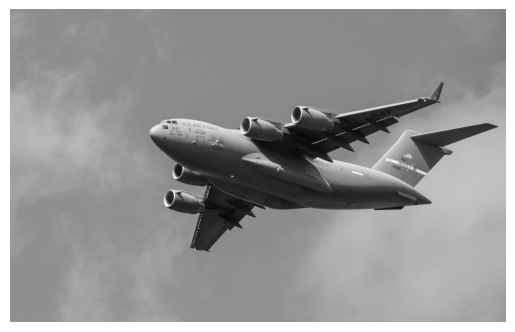

2270 3600
[152 152 154 154 151 159 155 158 154 159 160 152 160 155 161 153 156 155
 151 154 150 149 150 164 156 158 158 155 161 152]
[255 255 255 255 255 255 255 255 255 255 255 255 255 255 161 255 255 255
 255 255 255 149 255 164 255 255 255 255 161 255]


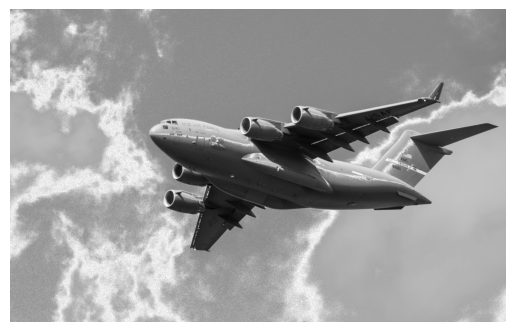

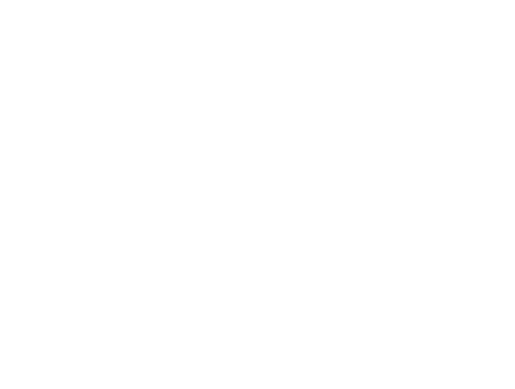

In [23]:

#범위 강조 : 일정 범위의 픽셀만 두드러지게 만드는 방법

#명암 대조가 뚜렷해지고 해당 부분이 돋보이는 효과

import cv2

import matplotlib.pyplot as plt

img = cv2.imread("c:/data/images/plane.jpg")

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.imshow(gray,cmap='gray')

plt.axis("off")

plt.show()

############################

out = gray.copy()

height, width = gray.shape

print(height,width)

############################

low = 150

high = 160

print(out[50][:30])

for row in range(height):

    for col in range(width):

        if low <= out[row][col] <= high:

            out[row][col] = 255

print(out[50][:30])            

############################

plt.imshow(out,cmap='gray')

plt.axis("off")

plt.show()

plt.axis("off")

plt.show()



* 명암대비스트레칭

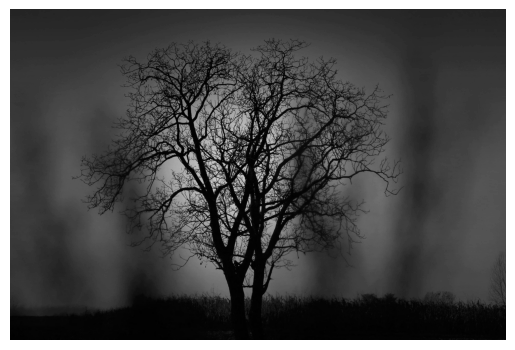

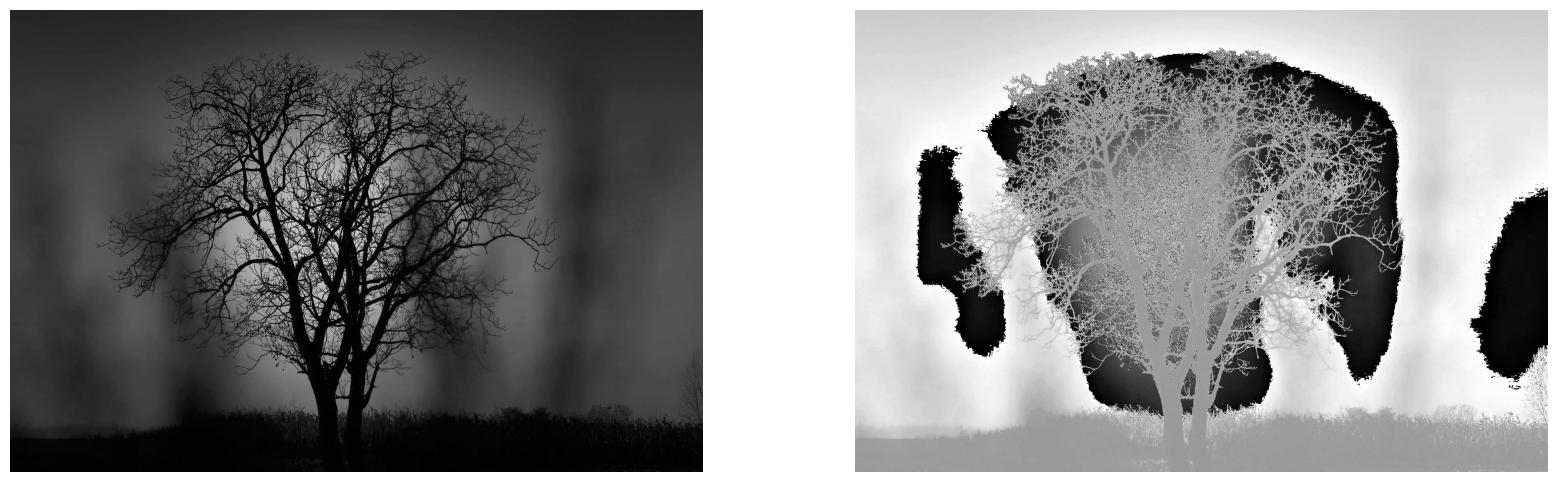

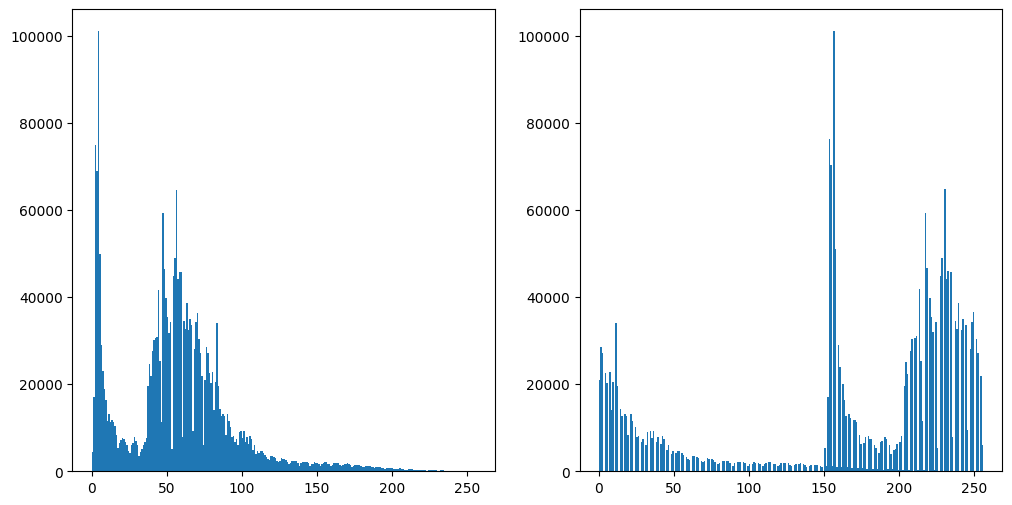

In [25]:

# 명암대비 스트레칭 : 명암대비가 낮은 영상을 명암대비가 높은 영상으로 늘려주는 작업, 히스토그램의 분포를 넓히는 작업, 어둡게 촬영된 영상의 히스토그램을 조절하여 명암 분포가 빈약한 영상을 균일하게 만들어 주는 작업.

import cv2

import matplotlib.pyplot as plt

#img = cv2.imread("c:/data/images/winter.jpg")
img = cv2.imread("c:/data/images/tree.jpg")

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.imshow(gray,cmap='gray')

plt.axis("off")

plt.show()

############################

out = gray.copy()

height, width = gray.shape

height, width

############################

# 명도값 = ((원래값 - 최저명도값) * 255) / (최고명도값 - 최저명도값)

############################

# 밝게 하는 경우

low = 75

high = 255

low, high

for i in range(height):

    for j in range(width):

        out[i][j] = ((gray[i][j] - low) * 255 / (high - low))

############################

# 어둡게 하는 경우

# low = 0

# high = 200

# low, high

# for i in range(height):

#     for j in range(width):

#         out[i][j] = ((gray[i][j] - low) * 255 / (high - low))

############################

plt.figure(figsize=(20,6))

plt.subplot(1, 2, 1)

plt.imshow(gray,cmap='gray')

plt.axis("off")

plt.subplot(1, 2, 2)

plt.imshow(out,cmap='gray')

plt.axis("off")

plt.show()

############################

plt.figure(figsize=(12,6))

plt.subplot(1, 2, 1)

plt.hist(gray.ravel(), 256, [0, 256])

plt.subplot(1, 2, 2)

plt.hist(out.ravel(), 256, [0, 256])

plt.show()

#픽셀에 대한 히스토그램, 밝기에 해당하는 명도값

#왼쪽으로 치우쳐 있으면 명암대비가 낮은 이미지, 오른쪽으로 치우쳐 있으면 명암대비가 높은 이미지



* 흐림효과

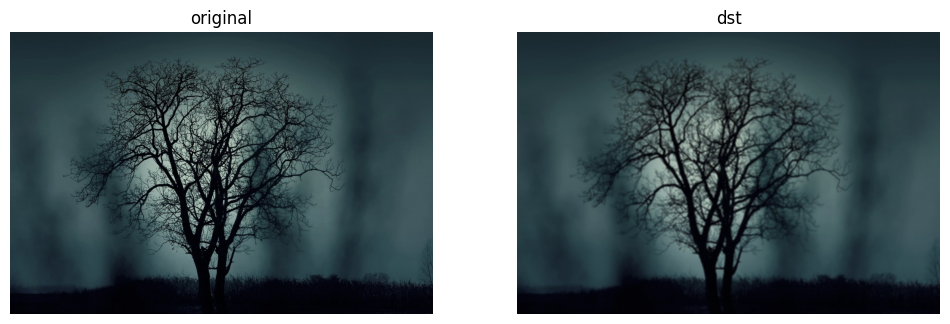

In [27]:

import cv2

import matplotlib.pyplot as plt

#img = cv2.imread("c:/data/images/winter.jpg")
img = cv2.imread("c:/data/images/tree.jpg")

image_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

image_rgb.shape

############################

dst = cv2.blur(img, (9, 9)) #커널 사이즈(값이 클수록 흐려짐)

############################

plt.figure(figsize=(12,8))

plt.subplot(1,2,1)

plt.imshow(image_rgb)

plt.title('original')

plt.axis("off")

plt.subplot(1,2,2)

image_rgb = cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)

plt.imshow(image_rgb)

plt.title('dst')

plt.axis("off")

plt.show()



* 히스토그램평탄화1

In [ ]:

import cv2

from matplotlib import pyplot as plt

img1 = cv2.imread("c:/data/images/img6.jpg", cv2.IMREAD_GRAYSCALE)

img1 = cv2.resize(img1, (320, 240))

plt.imshow(img1,cmap='gray')

plt.axis("off")

plt.show()

##################################

import numpy as np

#히스토그램 평탄화(평활화)

res1 = cv2.equalizeHist(img1)

ch1 = [0]

ranges1 = [0, 256]

histSize1 = [256]

#히스토그램 계산

hist1 = cv2.calcHist([img1], ch1, None, histSize1, ranges1)

hist2 = cv2.calcHist([res1], ch1, None, histSize1, ranges1)

#상수곱, 로그곱, 거듭제곱 변환 기반 명암비 조절 및 히스토그램 계산

multi_lut = np.full(shape=[256], fill_value=0, dtype=np.uint8)

log_lut = np.full(shape=[256], fill_value=0, dtype=np.uint8)

invol1_lut = np.full(shape=[256], fill_value=0, dtype=np.uint8)

multi_v = 2; gamma1 = 0.4

thres1 = 5; thres2 = 100

max_v_log = 255 / np.log(1 + 255)

max_v_invol1 = 255 / np.power(255, gamma1)

for i in range(256):

    val = i * multi_v

    if val > 255 : val = 255

    multi_lut[i] = val

    log_lut[i] = np.round(max_v_log * np.log(1+i))

# 명암비 조절

res2 = cv2.LUT(img1, multi_lut)

res3 = cv2.LUT(img1, log_lut)

hist3 = cv2.calcHist([res2], ch1, None, histSize1, ranges1)

hist4 = cv2.calcHist([res3], ch1, None, histSize1, ranges1)

##################################

bin_x = np.arange(256)

fig_index = 0

displays = [("input", img1),

            ("equalizeHist", res1),

            ("multi", res2),

            ("log", res3)]

plt.figure(figsize=(20,5))

for idx,(name, out) in enumerate(displays):

    plt.subplot(1,4,idx+1)    

    image = cv2.cvtColor(out, cv2.COLOR_BGR2RGB)

    plt.imshow(image)

    plt.title(name)

    plt.axis("off")

    

plt.show()

##################################

dlsplay_hist = [("Input Histogram", hist1),

                ("Equalization-convert Histogram", hist2),

                ("Multiply-convert Histogram", hist3),

                ("log-convert Histogram", hist4)]

for (name, out) in dlsplay_hist:

    plt.figure(fig_index)

    plt.title(name); plt.xlabel("Bin"); plt.ylabel("Frequency")

    plt.bar(bin_x, out[:,0], width=6, color='g')

    plt.grid(True, lw=1, ls='--', c='.75')

    plt.xlim([0, 255])

    fig_index += 1

plt.show()

##################################

img1 = cv2.imread("c:/data/images/apple.jpg")

channels = cv2.split(img1)

colors = ('b', 'g', 'r')

for (ch, color) in zip (channels, colors):

    hist = cv2.calcHist([ch], [0], None, [256], [0, 256])

    plt.plot(hist, color = color)

plt.show()



* 히스토그램평탄화2

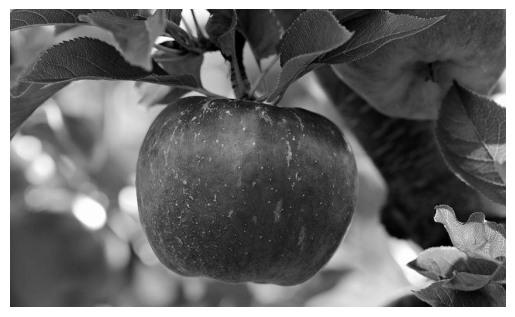

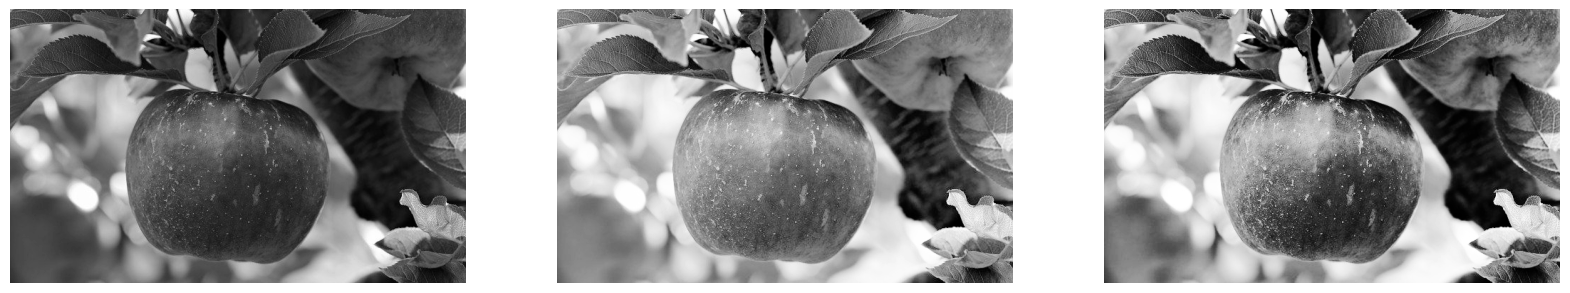

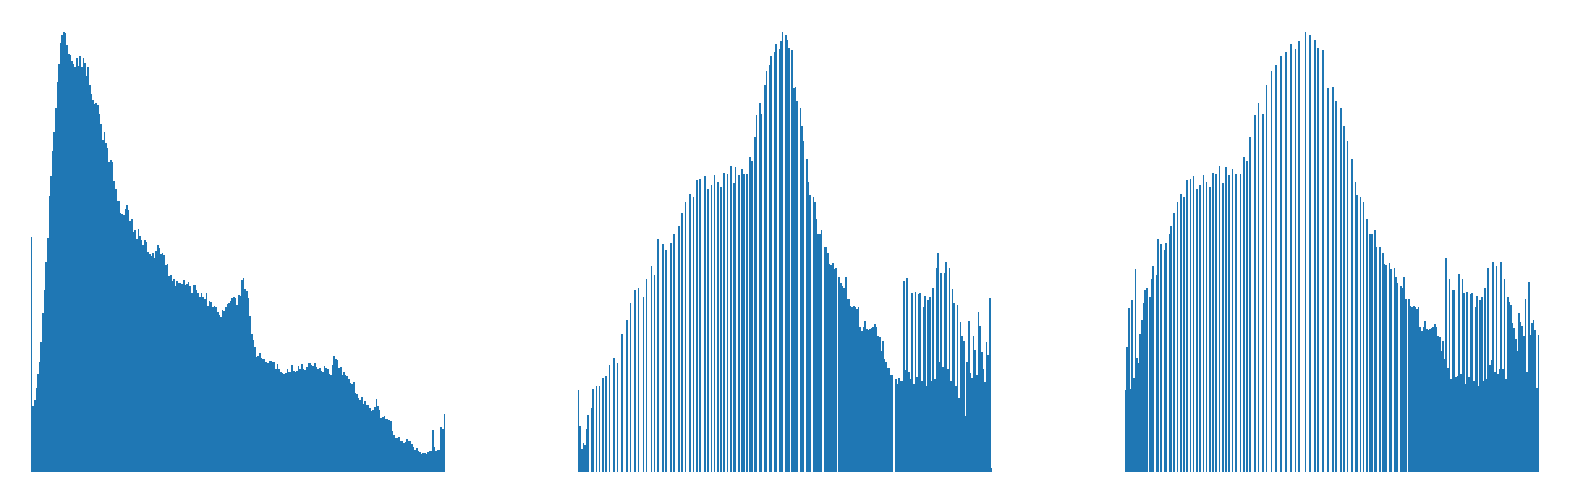

In [28]:
# Histogram equalization, 히스토그램 평탄화

# 히스토그램이 특정 영역에 집중되어 있는 부분을 평탄하게 만들어주는 작업

############################

import cv2

import matplotlib.pyplot as plt

img = cv2.imread("c:/data/images/apple.jpg")

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.imshow(gray,cmap='gray')

plt.axis("off")

plt.show()

############################

import numpy as np

histogram, bin = np.histogram(img.ravel(), 256, [0, 256])

cumsum = histogram.cumsum()

#LUT(Look Up Table, 룩업 테이블)

# A = B의 집합, A를 입력하면 B가 리턴됨, 반복문을 돌리는 것보다 빠른 연산 속도

LUT = np.uint8((cumsum - cumsum.min()) * 255 / (cumsum.max() - cumsum.min()))

equ = LUT[gray]

hist = cv2.equalizeHist(gray) #color 이미지에 적용할 경우 별도의 변환 과정 필요

############################

plt.figure(figsize=(20,6))

plt.subplot(1, 3, 1)

plt.imshow(gray,cmap='gray')

plt.axis("off")

plt.subplot(1, 3, 2)

plt.imshow(equ,cmap='gray')

plt.axis("off")

plt.subplot(1, 3, 3)

plt.imshow(hist,cmap='gray')

plt.axis("off")

plt.show()

############################

plt.figure(figsize=(20,6))

plt.subplot(1, 3, 1)

plt.hist(img.ravel(), 256, [0, 256])

plt.axis("off")

plt.subplot(1, 3, 2)

plt.hist(equ.ravel(), 256, [0, 256])

plt.axis("off")

plt.subplot(1, 3, 3)

plt.hist(hist.ravel(), 256, [0, 256])

plt.axis("off")

plt.show()

#그림1(원본): 왼쪽으로 치우친 히스토그램

#그림2: 직접 계산

#그림3: 함수로 계산

* 히스토그램평탄화3

In [ ]:
###########################

import cv2 as cv

import matplotlib.pyplot as plt

img=cv.imread('d:/images/mistyroad.jpg')

gray=cv.cvtColor(img,cv.COLOR_BGR2GRAY)        

plt.imshow(gray,cmap='gray')

plt.xticks([])

plt.yticks([])

plt.show()

###########################

h=cv.calcHist([gray],[0],None,[256],[0,256])    

plt.plot(h,color='r',linewidth=1)

plt.show()

###########################

# 히스토그램 평활화

equal=cv.equalizeHist(gray)            

plt.imshow(equal,cmap='gray')

plt.xticks([])

plt.yticks([])

plt.show()

###########################

h=cv.calcHist([equal],[0],None,[256],[0,256])    

plt.plot(h,color='r',linewidth=1)

plt.show()

* 히스토그램명세화

In [ ]:
# 히스토그램 명세화 : 히스토그램이 한쪽으로 치우친 영상을 조정하여 명암대비를 개선시키는 기법

# 1. 원본 영상을 평탄화

# 2. 원하는 히스토그램 모양(타깃 히스토그램)에 해당하는 히스토그램을 평탄화한다.

#   원본 영상이 왼쪽으로 치우쳐있다면(어두움) 중앙이나 오른쪽에 치우친 영상의 히스토그램을 만들고 평탄화 작업

# 3. 평탄화된 타겟 히스토그램을 다시 역 평탄화

# 4. 역평탄화된 타깃 히스토그램에 해당하는 LUT(룩 업 테이블)을 가지고 평탄화된 원본 영상에 매칭

#명도    정규화된 누적합    역히스토그램 값

#   0    0                0          

#   1    0                3

#   2    0                3

#   3    1.42            4

#   4    2.84            5

#   5    5                5

#역히스토그램값은 정규화된 누적합과 가장 가까운 값으로 설정

#명도 1의 경우 1.42 와 가장 가까우므로 3

#명도 4의 경우 5 와 가장 가까우므로 5

############################

import cv2

import matplotlib.pyplot as plt

img = cv2.imread("c:/data/images/apple.jpg")

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#히스토그램을 참조하기 위한 이미지(히스토그램을 직접 구성하는 것보다는 다른 이미지의 히스토그램을 참조하는 방법)

target = cv2.imread('c:/data/images/peppers.png')

target_gray = cv2.cvtColor(target, cv2.COLOR_BGR2GRAY)

plt.imshow(gray,cmap='gray')

plt.axis("off")

plt.show()

plt.imshow(target_gray,cmap='gray')

plt.axis("off")

plt.show()

############################

#마스크 배열

import numpy as np

mask = np.ma.less_equal([-2,-3,-1,0], -1)

mask

############################

import numpy as np

import numpy.ma as ma

# 네번째 항목을 유효하지 않은 것으로 표시

x = np.array([1, 2, 3, -1, 5])

#마스크 배열:

mx = ma.masked_array(x, mask=[0, 0, 0, 1, 0]) # 네번째 값에 마스크 처리

mx

# 마스킹된 값을 제외한 평균값

#print(mx.mean())

############################

# 원본과 참조 이미지의 누적합의 차이 계산

import numpy as np

shape = gray.shape

original = gray.ravel()

specified = target_gray.ravel()

s_values, bin_idx, s_counts = np.unique(original, return_inverse=True, return_counts=True)

t_values, t_counts = np.unique(specified, return_counts=True)

s_quantiles = np.cumsum(s_counts).astype(np.float64)

s_quantiles /= s_quantiles[-1] #가장 큰 값(마지막값)으로 나눔

sour = np.around(s_quantiles * 255) # 255를 곱하고 반올림 처리

t_quantiles = np.cumsum(t_counts).astype(np.float64)

t_quantiles /= t_quantiles[-1]

temp = np.around(t_quantiles * 255)

b = []

for data in sour:

    diff = temp - data

    mask = np.ma.less_equal(diff, -1) # -1 이하이면 True, 아니면 False    

    if np.all(mask): # 모두 True이면(모두 -1이면) True, 아니면 False

        c = np.abs(diff).argmin()

        b.append(c)

    masked_diff = np.ma.masked_array(diff, mask)

    b.append(masked_diff.argmin()) #가장 작은 값 입력

b=np.array(b)

out = np.array(b[bin_idx].reshape(shape))

############################

plt.figure(figsize=(20,6))

plt.subplot(1, 3, 1)

plt.imshow(gray,cmap='gray')

plt.axis("off")

plt.subplot(1, 3, 2)

plt.imshow(target_gray,cmap='gray')

plt.axis("off")

plt.subplot(1, 3, 3)

plt.imshow(out,cmap='gray')

plt.axis("off")

plt.show()

############################

plt.figure(figsize=(20,6))

plt.subplot(1, 3, 1)

plt.hist(img.ravel(), 256, [0, 256])

plt.axis("off")

plt.subplot(1, 3, 2)

plt.hist(target.ravel(), 256, [0, 256])

plt.axis("off")

plt.subplot(1, 3, 3)

plt.hist(out.ravel(), 256, [0, 256])

plt.axis("off")

plt.show()

#그림1(원본): 왼쪽으로 치우친 히스토그램

#그림2: 참조 이미지의 히스토그램

#그림3: 참조 이미지의 히스토그램을 반영하여 원본이미지의 히스토그램을 조정

* 블러링-스무딩-샤프닝

In [ ]:
# 블러링 - 흐리게

# 스무딩 - 부드럽게

# 샤프닝 - 날카롭게

############################

import cv2

import numpy as np

img = cv2.imread("c:/data/images/autumn.jpg")

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#블러링(픽셀의 평균값)

#블러링 마스크의 크기가 크면 영상이 흐려짐

# 1/n

# 3x3 , 모두 더하면 1

blurring_mask1 = np.array([[1 / 9, 1 / 9, 1 / 9],

                           [1 / 9, 1 / 9, 1 / 9],

                           [1 / 9, 1 / 9, 1 / 9]])

# 5x5

blurring_mask2 = np.array([[1 / 25, 1 / 25, 1 / 25, 1 / 25, 1 / 25],

                           [1 / 25, 1 / 25, 1 / 25, 1 / 25, 1 / 25],

                           [1 / 25, 1 / 25, 1 / 25, 1 / 25, 1 / 25],

                           [1 / 25, 1 / 25, 1 / 25, 1 / 25, 1 / 25],

                           [1 / 25, 1 / 25, 1 / 25, 1 / 25, 1 / 25]])

# 스무딩 : 경계선이 뚜렷해짐

smoothing_mask = np.array([[1 / 16, 1 / 8, 1 / 16],

                           [1 / 8, 1 / 4, 1 / 8],

                           [1 / 16, 1 / 8, 1 / 16]])

# 샤프닝

# 중앙값 9, 나머지 픽셀 -1x8, 모두 더하면 1

# 중앙값이 클수록 원본 영상보다 거친 느낌

sharpening_mask1 = np.array([[-1, -1, -1],

                             [-1, 9, -1],

                             [-1, -1, -1]])

sharpening_mask2 = np.array([[0, -1, 0],

                             [-1, 5, -1],

                             [0, -1, 0]])

blurring_out1 = cv2.filter2D(gray, -1, blurring_mask1)

blurring_out2 = cv2.filter2D(gray, -1, blurring_mask2)

smoothing_out = cv2.filter2D(gray, -1, smoothing_mask)

sharpening_out1 = cv2.filter2D(gray, -1, sharpening_mask1)

sharpening_out2 = cv2.filter2D(gray, -1, sharpening_mask2)

############################

import matplotlib.pyplot as plt

plt.figure(figsize=(20,20))

plt.subplot(3, 2, 1)

plt.imshow(gray,cmap='gray')

plt.title('original')

plt.axis("off")

plt.subplot(3, 2, 2)

plt.imshow(blurring_out1,cmap='gray')

plt.title('blurring(3X3)')

plt.axis("off")

plt.subplot(3, 2, 3)

plt.imshow(blurring_out2,cmap='gray')

plt.title('blurring(5X5)')

plt.axis("off")

plt.subplot(3, 2, 4)

plt.imshow(smoothing_out,cmap='gray')

plt.title('smoothing')

plt.axis("off")

plt.subplot(3, 2, 5)

plt.imshow(sharpening_out1,cmap='gray')

plt.title('sharpening1')

plt.axis("off")

plt.subplot(3, 2, 6)

plt.imshow(sharpening_out2,cmap='gray')

plt.title('sharpening2')

plt.axis("off")

plt.show()

* 침식팽창

In [ ]:
# Erosion : 침식, 잡음 제거

# 객체의 경계를 깎아내어 물체의 크기는 축소시키고, 배경은 확장시키는 방법

# 잡음이나 불필요한 작은 물체를 제거, 서로 닿은 물체를 분리

# Dilation : 팽창, 영상을 뚜렷하게 만드는 기법

# 배경을 축소시키고 물체의 크기를 확장시키는 방법

############################

import cv2

import numpy as np

img = cv2.imread("c:/data/images/penguin.png")

############################

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

height, width = gray.shape

out = np.zeros((height + 2, width + 2), dtype=np.uint8) #제로 패딩

out[1:1 + height, 1:1+width] = gray.copy()

erode = np.zeros_like(gray) # 침식 연산을 위한 빈 영상

dilate = np.zeros_like(gray) # 팽창 연산을 위한 빈 영상

# 직접 계산하는 방식

for i in range(height):

    for j in range(width):

        temp = out[i:i+3, j:j+3]

        erode[i][j] = np.min(temp) #침식 연산(범위의 최소값)

        dilate[i][j] = np.max(temp) #팽창 연산(범위의 최대값)

# 함수를 사용하는 방식

array = np.array([[1, 1, 1], [1, 1, 1], [1, 1, 1]])

erosion = cv2.erode(gray, array)

dilation = cv2.dilate(gray, array)

#침식 연산은 선이 굻고 어둡게, 팽창 연산은 선이 가늘고 밝게 출력됨

############################

import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))

plt.subplot(151)

plt.imshow(gray, cmap='gray') # 원본 이미지

plt.title('original')

plt.subplot(152)

plt.imshow(erode, cmap='gray') # 침식 연산(반복문 사용)

plt.title('erosion')

plt.subplot(153)

plt.imshow(dilate, cmap='gray') # 팽창 연산(반복문 사용)

plt.title('dilation')

plt.subplot(154)

plt.imshow(erosion, cmap='gray') # 침식 연산(함수 사용)

plt.title('erosion2')

plt.subplot(155)

plt.imshow(dilation, cmap='gray') # 팽창 연산(함수 사용)

plt.title('dilation2')

plt.show()

* 열림닫힘

In [ ]:
# opening(열림) 연산 : 침식 연산 이후 팽창 연산 적용, 침식 연산 후 원본 영상과의 차이를 줄이는 효과

# closing(닫힘) 연산 : 팽창 연산 이후 침식 연산 적용, 좁은 간격으로 분리되어 있던 두 객체가 연결되는 효과

############################

import cv2

import numpy as np

img = cv2.imread("c:/data/images/winter.jpg")

############################

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

height, width = gray.shape

out = np.zeros((height + 2, width + 2), dtype=np.uint8)

out2 = np.zeros((height + 2, width + 2), dtype=np.uint8)

out[1:1 + height, 1:1+width] = gray.copy()

opened = np.zeros_like(gray)

closed = np.zeros_like(gray)

#침식 연산과 팽창 연산

for i in range(height):

    for j in range(width):

        temp = out[i:i+3, j:j+3]

        opened[i][j] = np.min(temp)

        closed[i][j] = np.max(temp)

out[1:1 + height, 1:1+width] = opened.copy()

out2[1:1 + height, 1:1 + width] = closed.copy()

#첫번째와 반대로 침식 연산과 팽창 연산

for i in range(height):

    for j in range(width):

        temp = out[i:i+3, j:j+3]

        temp2 = out2[i:i + 3, j:j + 3]

        opened[i][j] = np.max(temp)

        closed[i][j] = np.min(temp2)

#제로 패딩 제거        

opened = opened[1:-1, 1:-1]

closed = closed[1:-1, 1:-1]

#함수를 사용하는 방법

array = np.array([[1, 1, 1], [1, 1, 1], [1, 1, 1]])

opening = cv2.dilate(cv2.erode(gray, array), array)

closing = cv2.erode(cv2.dilate(gray, array), array)

############################

import matplotlib.pyplot as plt

plt.figure(figsize=(15,15))

plt.subplot(321)

plt.imshow(gray, cmap='gray') # 원본 이미지

plt.title('original')

plt.subplot(323)

plt.imshow(opened, cmap='gray') # 열림 연산(반복문 사용) - 침식 후 팽창

plt.title('opening')

plt.subplot(324)

plt.imshow(closed, cmap='gray') # 닫힘 연산(반복문 사용) - 팽창 후 침식

plt.title('closing')

plt.subplot(325)

plt.imshow(opening, cmap='gray') # 열림 연산(함수 사용)

plt.title('opening2')

plt.subplot(326)

plt.imshow(closing, cmap='gray') # 닫힘 연산(함수 사용)

plt.title('closing2')

plt.show()

#기차의 라이트를 확인

#열림 연산 : 라이트가 흐려짐

#닫힘 연산 : 라이트가 밝아짐

* 블록껍질

In [ ]:
# Convex Hull, 블록 껍질

#윤곽선(points, contours)의 경계면을 둘러싸는 다각형을 구하는 알고리즘

############################

import cv2

import matplotlib.pyplot as plt

img = cv2.imread("c:/data/images/convex.jpg")

src = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(src)

plt.axis("off")

plt.show()

############################

dst = src.copy()

gray = cv2.cvtColor(src, cv2.COLOR_RGB2GRAY)

ret, binary = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY_INV)

contours, hierarchy = cv2.findContours(binary, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_NONE)

for i in contours:

    #cv2.convexHull(윤곽선, 방향)

    hull = cv2.convexHull(i, clockwise=True)

    cv2.drawContours(dst, [hull], 0, (0, 0, 255), 2)

############################

plt.imshow(dst)

plt.title('image1')

plt.axis("off")

plt.show()

* 마스크처리

In [ ]:
###########################

import cv2

import numpy as np

import matplotlib.pyplot as plt

img = cv2.imread("d:/images/rear_garden.PNG")

(height, width) = img.shape[:2]

center = (width // 2, height // 2)

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img)

###########################

# mask 생성

mask = np.zeros(img.shape[:2], dtype = "uint8")

# mask에 filter 출력

cv2.circle(mask, center, 200, (255, 255, 255), -1)

plt.imshow(mask)

###########################

# 이미지에 mask 적용

masked = cv2.bitwise_and(img, img, mask = mask)

plt.imshow(masked)

* 키이벤트

In [ ]:
import cv2

img = cv2.imread('d:/images/winter.jpg')

cv2.namedWindow('img')

cv2.imshow('img', img)

while True:

    keycode = cv2.waitKey()

    if keycode == ord('i') or keycode == ord('I'):

        img = ~img

        cv2.imshow('img', img)

    elif keycode == 27 or keycode == ord('q') or keycode == ord('Q'):

        break

cv2.destroyAllWindows()

* 키이벤트2

In [ ]:
import cv2

img_file = "d:/images/coffee.jpg"

img = cv2.imread(img_file)

title = 'IMG'                  

x, y = 100, 100              

while True:

    cv2.imshow(title, img)

    cv2.moveWindow(title, x, y)

    key = cv2.waitKey(0) & 0xFF # 키입력 무한 대기

    print(key, chr(key))        

    if key == ord('h'):        

        x -= 10

    elif key == ord('j'):      

        y += 10

    elif key == ord('k'):      

        y -= 10

    elif key == ord('l'):      

        x += 10

    elif key == ord('q') or key == 27:

        break

        

    cv2.moveWindow(title, x, y )  

cv2.destroyAllWindows()

* 마우스클릭이벤트

In [ ]:
import cv2

title = 'mouse event'                

img = cv2.imread('d:/images/blank_500.jpg')

cv2.imshow(title, img)                

colors = {'black':(0,0,0),

         'red' : (0,0,255),

         'blue':(255,0,0),

         'green': (0,255,0) }

def onMouse(event, x, y, flags, param):          

    color = colors['black']

    if event == cv2.EVENT_LBUTTONDOWN:

        # Ctrl & Shift

        if flags & cv2.EVENT_FLAG_CTRLKEY and flags & cv2.EVENT_FLAG_SHIFTKEY :

            color = colors['green']

        elif flags & cv2.EVENT_FLAG_SHIFTKEY : # shift

            color = colors['blue']

        elif flags & cv2.EVENT_FLAG_CTRLKEY : # ctrl

            color = colors['red']

        

        cv2.circle(img, (x,y), 30, color, -1)

        cv2.imshow(title, img)        

# 마우스 콜백 함수 등록

cv2.setMouseCallback(title, onMouse)  

while True:

    if cv2.waitKey(0) & 0xFF == 27:  

        break

    

cv2.destroyAllWindows()